In [2]:
# from oficial python
import numpy as np
import matplotlib.pyplot as plt
from qutip import Bloch
from matplotlib import cm
import matplotlib as mpl
from qutip import basis, concurrence, Qobj
import time
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import statistics
import os
from mpl_toolkits.mplot3d import Axes3D
from qutip import concurrence


# own modules:
from dll.spin_procesor_modificated import Quantum_Spin_Proces
from dll.main_fun import make_IRIS_v2, w_r_json, _test, plot_data, visualization_1_qubit, circle_v2
from dll. baseline_dru_v2 import Modelo_DRU
from dll.models import qcircuit_1_qubit_mixed, qcircuit_1_qubit, qcircuit_2_qubit_mixed, qcircuit_4_qubit_mixed
from dll.cost_functions import fidelity_cost, Renyi_Divergence_0_5, Renyi_Divergence_2
from dll.gate_procesor_modificated import CompositeGateProcessor


from dll.main_fun import pulse_x_cos, pulse_x

# Grafica de pulso

In [4]:
# Pulso cosenoidal B1:
ti = 1e-6
tf = 3e-6
delt_t = tf - ti
ω_x = (2*np.pi*4)/delt_t
print(f"Frecuencia = {ω_x /(2*np.pi)} [Hz]")
# Ejemplo de uso
tiempo = np.linspace(-1e-6, tf*1.80, 100)
args_ejemplo = {"t_init": ti, "t_final": tf, "w": ω_x}

pulso_cos = pulse_x_cos(tiempo, args_ejemplo)
pulso_square = pulse_x(tiempo, args_ejemplo)

# Visualización del pulso
fig, ax = plt.subplots(figsize=(5, 3))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(tiempo*1e6, pulso_cos, label="as")
plt.plot(tiempo*1e6, pulso_square , label='Pulso')
plt.title('Pulso cosenoidal & pulso unitario')
plt.xlabel('Tiempo [s]')
plt.ylabel('B[T]')
path_to_save_img = os.path.join("results_of_test","test_2","pulse.pdf")
plt.savefig(path_to_save_img , format='pdf', bbox_inches = 'tight')
plt.show()

Frecuencia = 1999999.9999999995 [Hz]


RuntimeError: latex was not able to process the following string:
b'Pulso cosenoidal & pulso unitario'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpff2mqi7v 727dfd4c40076d74fbfd53d3cd65d2bf.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 24.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(727dfd4c40076d74fbfd53d3cd65d2bf.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-04>
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg))
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore.st
y)
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/firstaid\underscore-ltx.
sty) (C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvip
s.def)
No file 727dfd4c40076d74fbfd53d3cd65d2bf.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.29 {\rmfamily Pulso cosenoidal &
                                   pulso unitario}%
No pages of output.
Transcript written on C:\Users\User\.matplotlib\tex.cache\72\7d\tmpff2mqi7v\727
dfd4c40076d74fbfd53d3cd65d2bf.log.
latex: major issue: So far, you have not checked for MiKTeX updates.




Error in callback <function _draw_all_if_interactive at 0x000002CFCB46BD80> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'Pulso cosenoidal & pulso unitario'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp2rnqu9to 727dfd4c40076d74fbfd53d3cd65d2bf.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 24.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(727dfd4c40076d74fbfd53d3cd65d2bf.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-04>
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg))
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore.st
y)
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/firstaid\underscore-ltx.
sty) (C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvip
s.def)
No file 727dfd4c40076d74fbfd53d3cd65d2bf.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.29 {\rmfamily Pulso cosenoidal &
                                   pulso unitario}%
No pages of output.
Transcript written on C:\Users\User\.matplotlib\tex.cache\72\7d\tmp2rnqu9to\727
dfd4c40076d74fbfd53d3cd65d2bf.log.
latex: major issue: So far, you have not checked for MiKTeX updates.




RuntimeError: latex was not able to process the following string:
b'Pulso cosenoidal & pulso unitario'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp74x70dqk 727dfd4c40076d74fbfd53d3cd65d2bf.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 24.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(727dfd4c40076d74fbfd53d3cd65d2bf.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-04>
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg))
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore.st
y)
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/firstaid\underscore-ltx.
sty) (C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\User\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvip
s.def)
No file 727dfd4c40076d74fbfd53d3cd65d2bf.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.29 {\rmfamily Pulso cosenoidal &
                                   pulso unitario}%
No pages of output.
Transcript written on C:\Users\User\.matplotlib\tex.cache\72\7d\tmp74x70dqk\727
dfd4c40076d74fbfd53d3cd65d2bf.log.
latex: major issue: So far, you have not checked for MiKTeX updates.




<Figure size 500x300 with 1 Axes>

# $R_x(\alpha = \Omega_x t)$

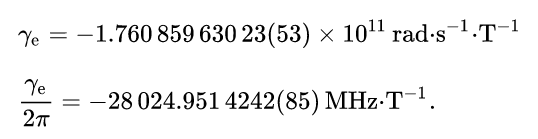

Sí $\Omega_x t = \alpha$ , entonces para encontrar $B1$:

$$γ \frac{B_1}{2}t = \alpha$$
$$ \rightarrow B_1 = \frac{2 \alpha}{γ t}$$

In [ ]:
# Parametros para fijar frecuencia de larmor
h = 1
# factor giromagnetico:
gir = 1.760e11
# angulo deseado:
alpha = np.pi/2
# Campo homogeneo:
B0 = 10e-3
print(f"B0 = {B0} [T]")
# Para girar univamente en el eje x se necesita hacer que
# wz = wx:
ω_z = gir*B0
ω_x = gir*B0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = (2*np.pi*1)/ω_x
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = (alpha*2)/(gir*delt_t)
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

B0 = 0.01 [T]
ω_x = 1760000000.0 [rad/s]
f_x = 280112699.8417358 [hz]
tiempo = 3.5699916518065832e-09 [s]
B1 = 0.005 [T]


In [ ]:
# Simulacion en RWA:
up = basis(2,0)
H0 = (h/2)*(ω_z-ω_x)*sigmaz()
H1 = (h/2)*O_x*sigmax()
H = [H0,[H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)
output_rwa = mesolve(H, up, tlist, c_ops, e_ops, args)

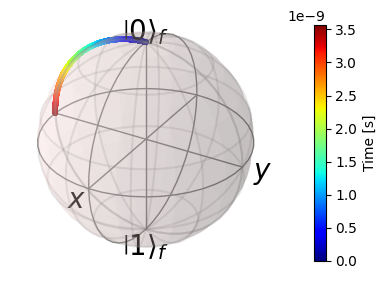

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
b=Bloch()
b.axes = ax1
b.fig = fig
## normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(0,delt_t)
colors = cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output_rwa.expect[0],output_rwa.expect[1],output_rwa.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
## plot sphere ##
## Add color bar ##
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
sm.set_array([])  # You need to set a dummy array for the right scaling
cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
cbar.set_label('Time [s]')
b.render()
plt.show()

In [ ]:
output_rwa.expect[0][-1]

0.0

In [ ]:
output_rwa.expect[1][-1]

-0.9999999999999615

In [ ]:
output_rwa.expect[2][-1]

2.771072848406497e-07

In [ ]:
# Simulacion sin RWA:
up = basis(2,0)
H0 = (h/2)*(ω_z)*sigmaz()
H1 = (h)*O_x*sigmax()
H = [H0,[H1, pulse_x_cos]]
args = {"t_init": 0, "t_final": delt_t, "w":ω_x}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 200000)
output_time = mesolve(H, up, tlist, c_ops, e_ops, args)

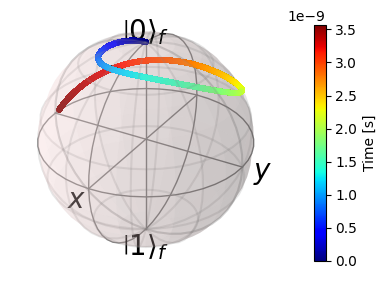

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
b=Bloch()
b.axes = ax1
b.fig = fig
## normalize colors to times in tlist ##
nrm=mpl.colors.Normalize(0,delt_t)
colors=cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output_time.expect[0],output_time.expect[1],output_time.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
## plot sphere ##
## Add color bar ##
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
sm.set_array([])  # You need to set a dummy array for the right scaling
cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
cbar.set_label('Time [s]')
b.render()
plt.show()

In [ ]:
output_time.expect[0][-1]

-0.06312431770531293

In [ ]:
output_time.expect[1][-1]

-0.9979802113696414

In [ ]:
output_time.expect[2][-1]

0.0071286905420892

# $R_z(\alpha = \Delta\omega t)$

In [ ]:
from qutip import basis, hadamard_transform

In [ ]:
# Parametros para fijar frecuencia de larmor
h = 1
# factor giromagnetico:
gir = 1.760e11
# angulo deseado:
alpha = np.pi/2
# Campo homogeneo:
B0 = 10e-3
print(f"B0 = {B0} [T]")
# Para girar univamente en el eje x se necesita hacer que
# wz = wx:
ω_z = gir*B0
ω_x = 0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = (alpha)/ω_z
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = 0
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

B0 = 0.01 [T]
ω_x = 0 [rad/s]
f_x = 0.0 [hz]
tiempo = 8.924979129516458e-10 [s]
B1 = 0 [T]


In [ ]:
# Simulacion en RWA:
ket_0 = basis(2, 0)
state_hadamard = hadamard_transform() * ket_0
H0 = (h/2)*(ω_z-ω_x)*sigmaz()
H1 = (h/2)*O_x*sigmax()
H = [H0,[H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)
output_rwa = mesolve(H, state_hadamard, tlist, c_ops, e_ops, args)

<ipython-input-18-6c0756c5b7dc>:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  state_hadamard = hadamard_transform() * ket_0


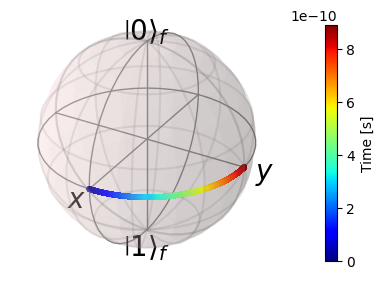

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
b=Bloch()
b.axes = ax1
b.fig = fig
## normalize colors to times in tlist ##
nrm=mpl.colors.Normalize(0,delt_t)
colors=cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output_rwa.expect[0],output_rwa.expect[1],output_rwa.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
## plot sphere ##
## Add color bar ##
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
sm.set_array([])  # You need to set a dummy array for the right scaling
cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
cbar.set_label('Time [s]')
b.render()
plt.show()

In [ ]:
output_rwa.expect[0][-1]

-2.3369104040771305e-08

In [ ]:
output_rwa.expect[1][-1]

0.9999999999999994

In [ ]:
output_rwa.expect[2][-1]

0.0

In [ ]:
# Simulacion sin RWA:
ket_0 = basis(2, 0)
state_hadamard = hadamard_transform() * ket_0
H0 = (h/2)*(ω_z)*sigmaz()
H1 = (h)*O_x*sigmax()
H = [H0,[H1, pulse_x_cos]]
args = {"t_init": 0, "t_final": delt_t, "w":ω_x}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 200000)
output_time = mesolve(H, state_hadamard, tlist, c_ops, e_ops, args)

<ipython-input-23-09d7fc97cbcb>:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  state_hadamard = hadamard_transform() * ket_0


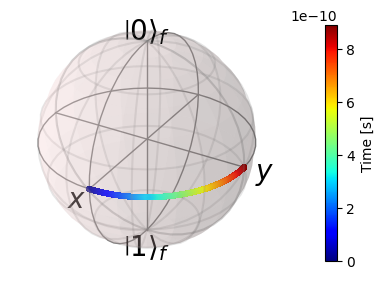

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
b=Bloch()
b.axes = ax1
b.fig = fig
## normalize colors to times in tlist ##
nrm=mpl.colors.Normalize(0,delt_t)
colors=cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output_time.expect[0],output_time.expect[1],output_time.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
## plot sphere ##
## Add color bar ##
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
sm.set_array([])  # You need to set a dummy array for the right scaling
cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
cbar.set_label('Time [s]')
b.render()
plt.show()

In [ ]:
output_time.expect[0][-1]

7.788203415515227e-11

In [ ]:
output_time.expect[1][-1]

1.0

In [ ]:
output_time.expect[2][-1]

0.0

#$R_y(\theta)$

In [ ]:
def traducir_a_positivo(angulo):
    while angulo < 0:
        angulo += 2 * np.pi
    return angulo

## Aproximacion con RWA

In [ ]:
# Parametros para fijar frecuencia de larmor
h = 1
# factor giromagnetico:
gir = 1.760e11
# Campo homogeneo:
B0 = 10e-3
print(f"B0 = {B0} [T]")

B0 = 0.01 [T]


In [ ]:
# RZ (-pi/2)

# angulo deseado:
alpha = -np.pi/2
alpha  = traducir_a_positivo(alpha)
# frecuencias:
ω_z = gir*B0
ω_x = 0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = (alpha)/ω_z
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = 0
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

ω_x = 0 [rad/s]
f_x = 0.0 [hz]
tiempo = 2.6774937388549373e-09 [s]
B1 = 0 [T]


In [ ]:
# Simulacion en RWA: RZ (-pi/2)
ket_0 = basis(2, 0)
H0 = (h/2)*(ω_z-ω_x)*sigmaz()
H1 = (h/2)*O_x*sigmax()
H = [H0,[H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)

output_rwa_1_exp = mesolve(H, ket_0, tlist, c_ops, e_ops, args)
output_rwa_1_states = mesolve(H, ket_0, tlist, c_ops, [], args)
end_state_1 = output_rwa_1_states.states[-1]

In [ ]:
# Rx (theta)

# angulo deseado:
alpha = np.pi/4
# Para girar univamente en el eje x se necesita hacer que
# wz = wx:
ω_z = gir*B0
ω_x = gir*B0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = (2*np.pi*1)/ω_x
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = (alpha*2)/(gir*delt_t)
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

ω_x = 1760000000.0 [rad/s]
f_x = 280112699.8417358 [hz]
tiempo = 3.5699916518065832e-09 [s]
B1 = 0.0025 [T]


In [ ]:
# Simulacion en RWA: Rx (theta)

H0 = (h/2)*(ω_z-ω_x)*sigmaz()
H1 = (h/2)*O_x*sigmax()
H = [H0,[H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)

output_rwa_2_exp = mesolve(H, end_state_1, tlist, c_ops, e_ops, args)
output_rwa_2_states = mesolve(H, end_state_1, tlist, c_ops, [], args)
end_state_2 = output_rwa_2_states.states[-1]

In [ ]:
# RZ (pi/2)

# angulo deseado:
alpha = np.pi/2
# frecuencias:
ω_z = gir*B0
ω_x = 0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = (alpha)/ω_z
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = 0
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

ω_x = 0 [rad/s]
f_x = 0.0 [hz]
tiempo = 8.924979129516458e-10 [s]
B1 = 0 [T]


In [ ]:
# Simulacion en RWA: RZ (pi/2)

H0 = (h/2)*(ω_z-ω_x)*sigmaz()
H1 = (h/2)*O_x*sigmax()
H = [H0,[H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)

output_rwa_3_exp = mesolve(H, end_state_2, tlist, c_ops, e_ops, args)
output_rwa_3_states = mesolve(H, end_state_2, tlist, c_ops, [], args)
end_state_3 = output_rwa_3_states.states[-1]

In [ ]:
delt_t

8.924979129516458e-10

In [ ]:
output_rwa_1_exp.expect[0]

array([0., 0., 0., ..., 0., 0., 0.])

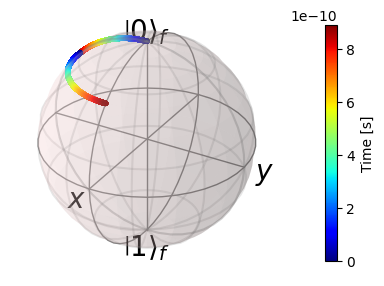

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
b=Bloch()
b.axes = ax1
b.fig = fig
## normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(0,delt_t)
colors = cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output_rwa_1_exp.expect[0],output_rwa_1_exp.expect[1],output_rwa_1_exp.expect[2]],'m')
b.add_points([output_rwa_2_exp.expect[0],output_rwa_2_exp.expect[1],output_rwa_2_exp.expect[2]],'m')
b.add_points([output_rwa_3_exp.expect[0],output_rwa_3_exp.expect[1],output_rwa_3_exp.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
sm.set_array([])  # You need to set a dummy array for the right scaling
cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
cbar.set_label('Time [s]')
b.render()
plt.show()

In [ ]:
output_rwa_2_exp.expect[0][-1]

4.884981308350689e-15

In [ ]:
output_rwa_2_exp.expect[1][-1]

-0.7071067187761171

In [ ]:
output_rwa_2_exp.expect[2][-1]

0.7071068435969724

## Aproximación sin RWA

In [ ]:
# Parametros para fijar frecuencia de larmor
h = 1
# factor giromagnetico:
gir = 1.760e11
# Campo homogeneo:
B0 = 10e-3
print(f"B0 = {B0} [T]")

# RZ (-pi/2)

# angulo deseado:
alpha = -np.pi/2
alpha  = traducir_a_positivo(alpha)
# frecuencias:
ω_z = gir*B0
ω_x = 0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = abs((alpha)/ω_z)
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = 0
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

# ket inicial
ket_0 = basis(2, 0)


H0 = (h/2)*(ω_z-ω_x)*sigmaz()
H1 = (h/2)*O_x*sigmax()
H = [H0,[H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)

output_rwa_1_exp = mesolve(H, ket_0, tlist, c_ops, e_ops, args)
output_rwa_1_states = mesolve(H, ket_0, tlist, c_ops, [], args)
end_state_1 = output_rwa_1_states.states[-1]


# Rx (theta)

# angulo deseado:
alpha = np.pi/4
# Para girar univamente en el eje x se necesita hacer que
# wz = wx:
ω_z = gir*B0
ω_x = gir*B0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = (2*np.pi*1)/ω_x
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = (alpha*2)/(gir*delt_t)
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

H0 = (h/2)*(ω_z)*sigmaz()
H1 = (h)*O_x*sigmax()
H = [H0,[H1, pulse_x_cos]]
args = {"t_init": 0, "t_final": delt_t, "w":ω_x}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)

tlist_c = tlist.copy()

output_rwa_2_exp = mesolve(H, end_state_1, tlist, c_ops, e_ops, args)
output_rwa_2_states = mesolve(H, end_state_1, tlist, c_ops, [], args)
end_state_2 = output_rwa_2_states.states[-1]

# RZ (pi/2)

# angulo deseado:
alpha = np.pi/2
# frecuencias:
ω_z = gir*B0
ω_x = 0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = (alpha)/ω_z
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = 0
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

H0 = (h/2)*(ω_z-ω_x)*sigmaz()
H1 = (h/2)*O_x*sigmax()
H = [H0,[H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)

output_rwa_3_exp = mesolve(H, end_state_2, tlist, c_ops, e_ops, args)
output_rwa_3_states = mesolve(H, end_state_2, tlist, c_ops, [], args)
end_state_3 = output_rwa_3_states.states[-1]

B0 = 0.01 [T]
ω_x = 0 [rad/s]
f_x = 0.0 [hz]
tiempo = 2.6774937388549373e-09 [s]
B1 = 0 [T]
ω_x = 1760000000.0 [rad/s]
f_x = 280112699.8417358 [hz]
tiempo = 3.5699916518065832e-09 [s]
B1 = 0.0025 [T]
ω_x = 0 [rad/s]
f_x = 0.0 [hz]
tiempo = 8.924979129516458e-10 [s]
B1 = 0 [T]


In [ ]:
tlist_c

tensor([0.00000000e+00, 3.57034869e-13, 7.14069737e-13, ...,
        3.56927758e-09, 3.56963462e-09, 3.56999165e-09], requires_grad=True)

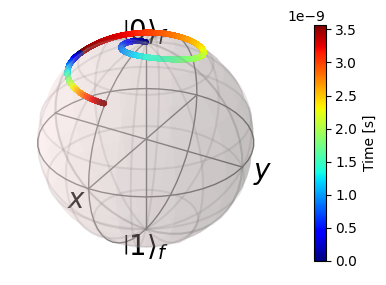

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
b=Bloch()
b.axes = ax1
b.fig = fig
## normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(0,3.5699916518065832e-09)
colors = cm.jet(nrm(tlist_c))
## add data points from expectation values ##
b.add_points([output_rwa_1_exp.expect[0],output_rwa_1_exp.expect[1],output_rwa_1_exp.expect[2]],'m')
b.add_points([output_rwa_2_exp.expect[0],output_rwa_2_exp.expect[1],output_rwa_2_exp.expect[2]],'m')
b.add_points([output_rwa_3_exp.expect[0],output_rwa_3_exp.expect[1],output_rwa_3_exp.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
sm.set_array([])  # You need to set a dummy array for the right scaling
cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
cbar.set_label('Time [s]')
b.render()
plt.show()

In [ ]:
output_rwa_2_exp.expect[0][-1]

-0.008821901881311933

In [ ]:
output_rwa_2_exp.expect[1][-1]

-0.7065303439345343

In [ ]:
output_rwa_2_exp.expect[2][-1]

0.7076277602998241

# CLASE DEFINITIVA


Porque cuando le pongo true al noise se desplaza si offset? REVISAR -> Posible explicación: Numero de Puntos.

### Clase $R_z$

In [5]:
from qutip import hadamard_transform

In [6]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

<ipython-input-7-6018060fba88>:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  state_hadamard = hadamard_transform() * ket_0


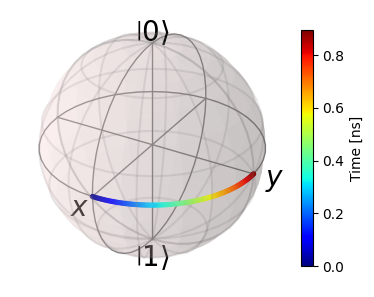

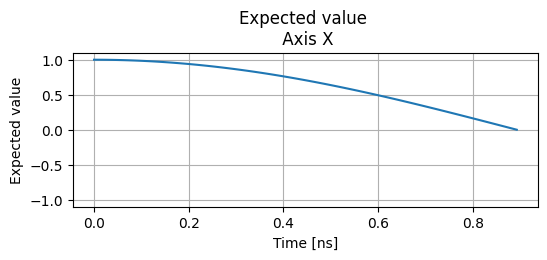

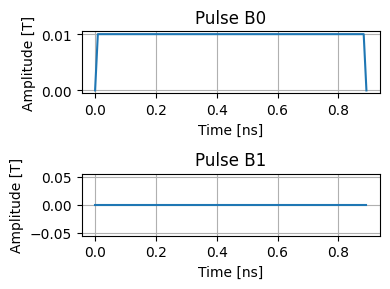

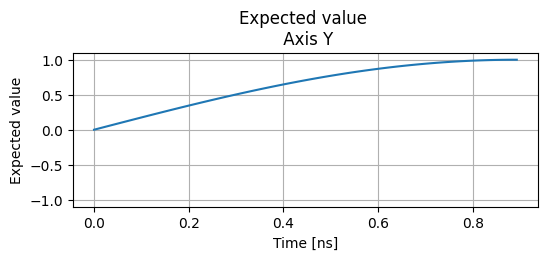

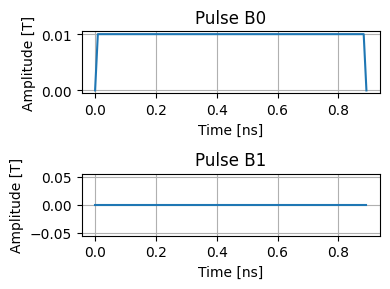

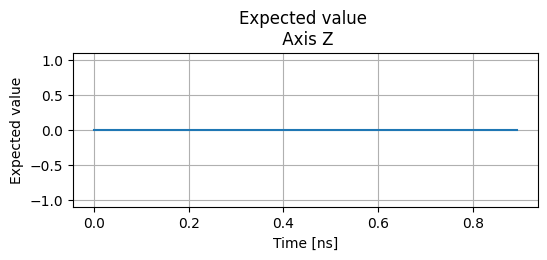

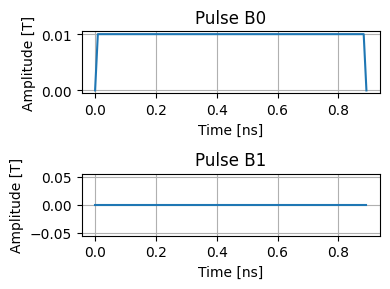

In [7]:
model = Quantum_Spin_Proces(tf_noise = False, noise_std = 0.00, B1_offset = 0)
ket_0 = basis(2, 0)
state_hadamard = hadamard_transform() * ket_0
out = model.Rz(np.pi/2, state_hadamard)
model.plot_expect(out)
model.plot_excharges(out, 0, False)
model.plot_excharges(out, 1, False)
model.plot_excharges(out, 2, False)

<ipython-input-8-f64ee815f7b0>:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  state_hadamard = hadamard_transform() * ket_0


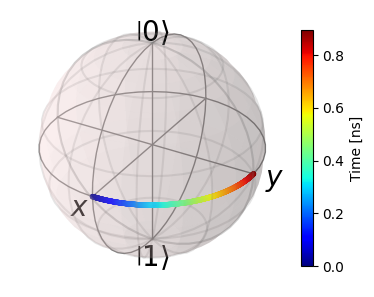

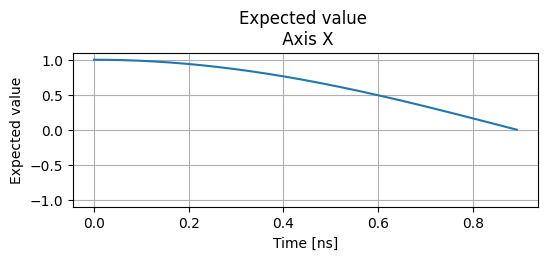

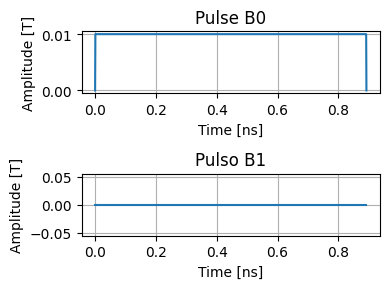

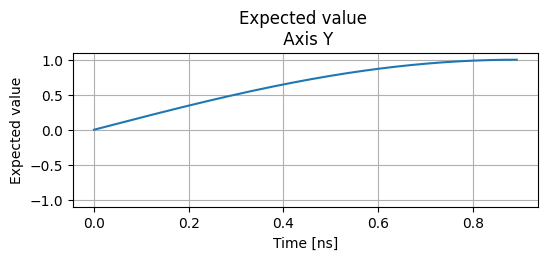

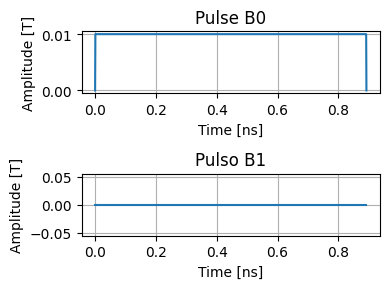

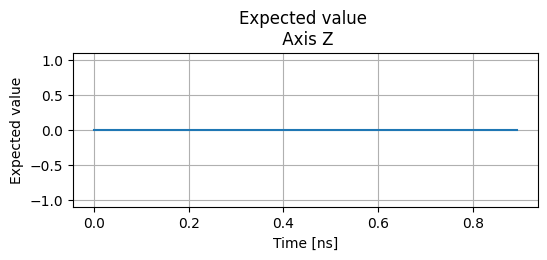

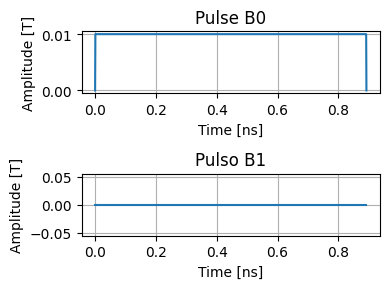

In [8]:
model = Quantum_Spin_Proces(tf_noise = True, noise_std = 0.5, B1_offset = 12, n_points_pulse_Ri = 1000)
ket_0 = basis(2, 0)
state_hadamard = hadamard_transform() * ket_0
out = model.Rz(np.pi/2, state_hadamard)
model.plot_expect(out)
model.plot_excharges(out, 0, False)
model.plot_excharges(out, 1, False)
model.plot_excharges(out, 2, False)

### Grafica de coherencia

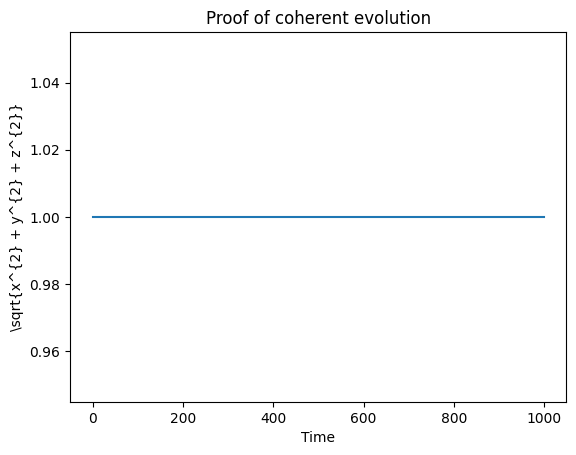

In [18]:
x = out.expect[0]
y = out.expect[1]
z = out.expect[2]
l = np.sqrt(x**2 + y**2 + z**2)

plt.figure()
plt.plot(l)
plt.title("Proof of coherent evolution")
plt.xlabel('Time')
plt.ylabel("\sqrt{x^{2} + y^{2} + z^{2}}")
plt.show()

### Clase $Rx$

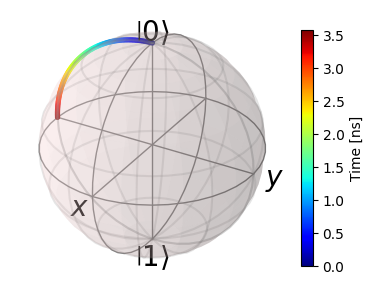

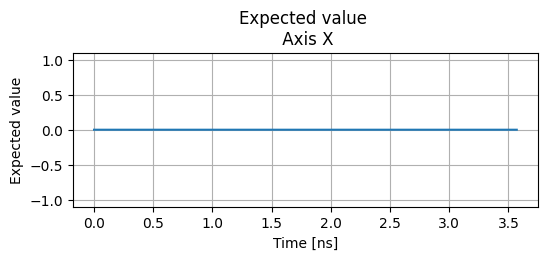

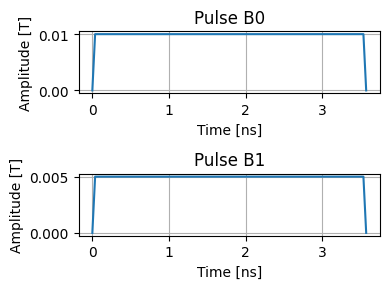

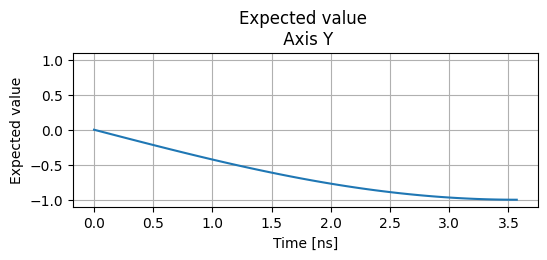

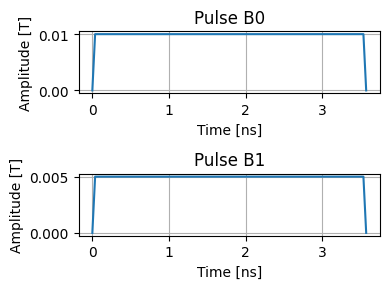

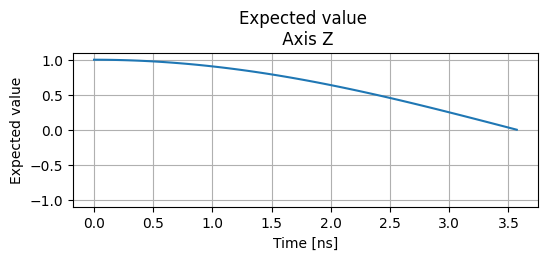

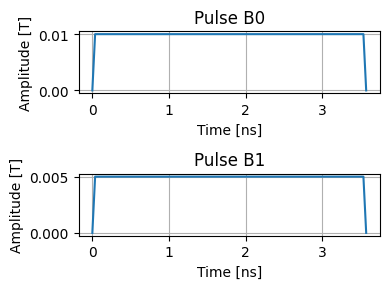

In [19]:
model = Quantum_Spin_Proces(tf_noise = False, noise_std = 5)
ket_0 = basis(2, 0)
out = model.Rx(np.pi/2, ket_0)
model.plot_expect(out)
model.plot_excharges(out, 0, False)
model.plot_excharges(out, 1, False)
model.plot_excharges(out, 2, False)

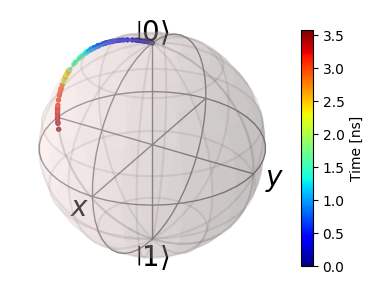

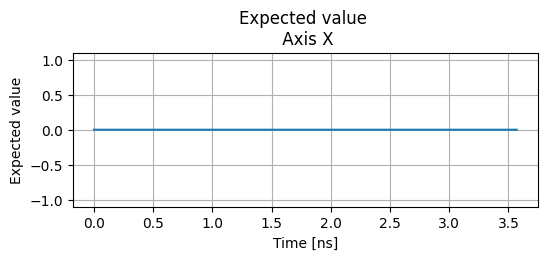

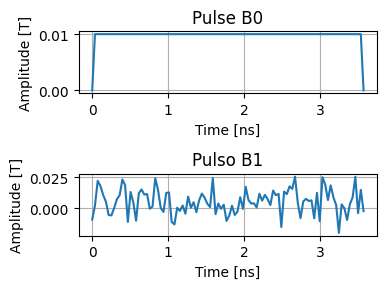

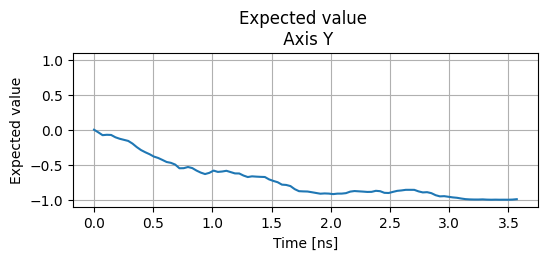

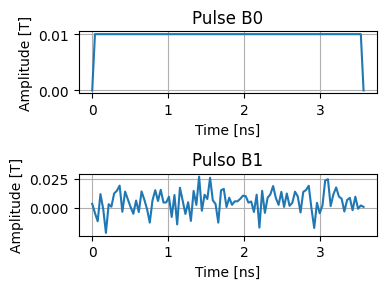

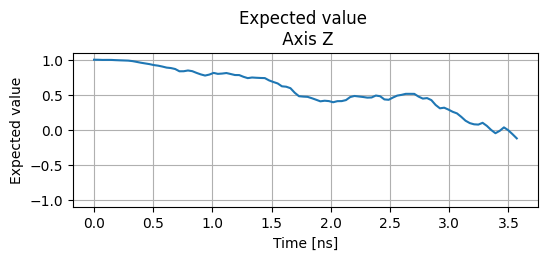

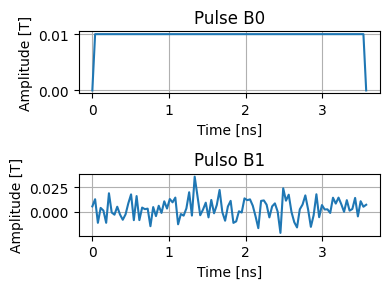

In [20]:
model = Quantum_Spin_Proces(tf_noise = True, noise_std = 0.01)
ket_0 = basis(2, 0)
out = model.Rx(np.pi/2, ket_0)
model.plot_expect(out)
model.plot_excharges(out, 0, False)
model.plot_excharges(out, 1, False)
model.plot_excharges(out, 2, False)

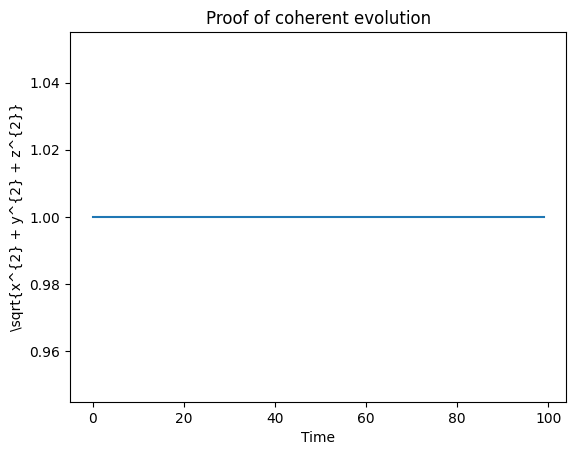

In [21]:
x = out.expect[0]
y = out.expect[1]
z = out.expect[2]
l = np.sqrt(x**2 + y**2 + z**2)

plt.figure()
plt.plot(l)
plt.title("Proof of coherent evolution")
plt.xlabel('Time')
plt.ylabel("\sqrt{x^{2} + y^{2} + z^{2}}")
plt.show()

### Clase $R_y$

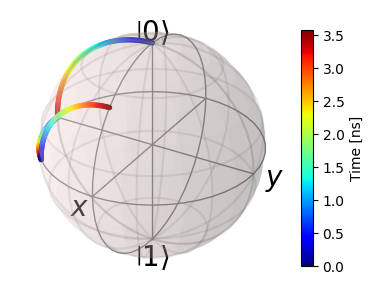

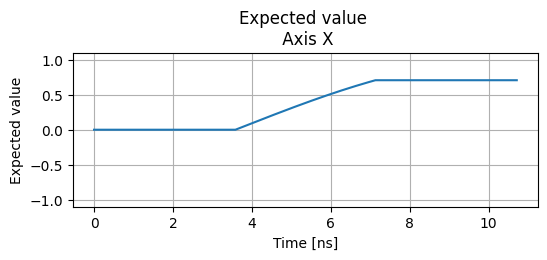

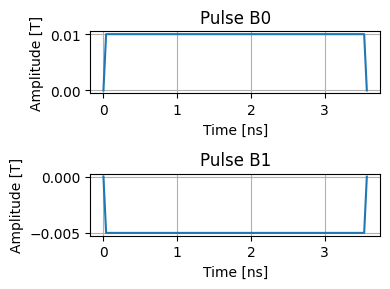

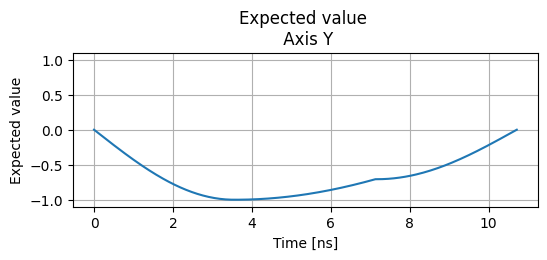

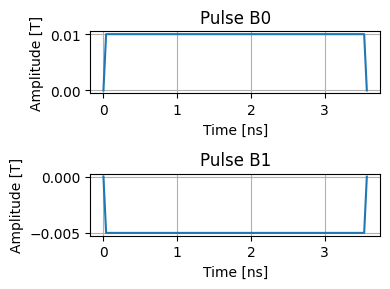

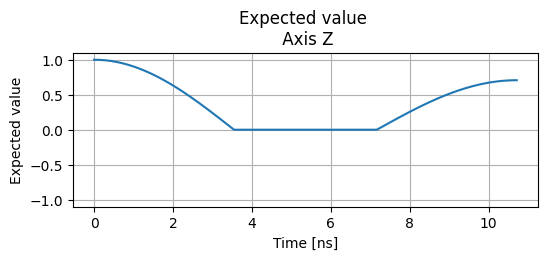

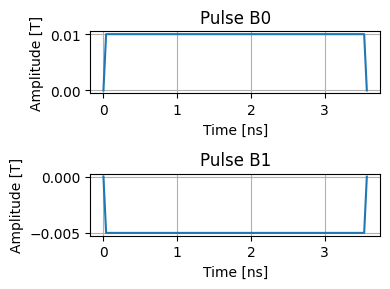

In [22]:
model = Quantum_Spin_Proces(tf_noise = False, noise_std = 0.1)
ket_0 = basis(2, 0)
out = model.Ry(np.pi/4, ket_0)
model.plot_expect(out, True)
model.plot_excharges(out, 0, True)
model.plot_excharges(out, 1, True)
model.plot_excharges(out, 2, True)

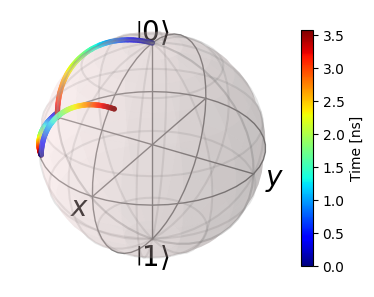

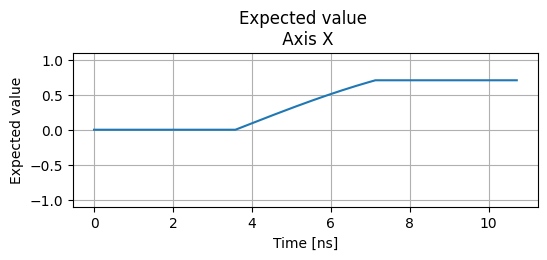

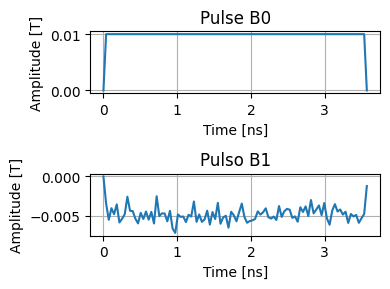

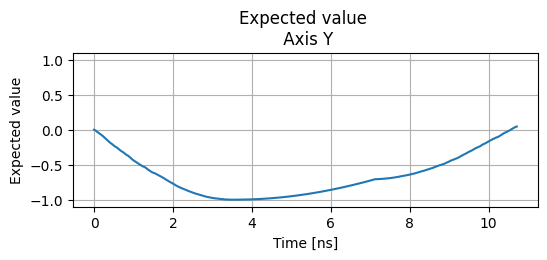

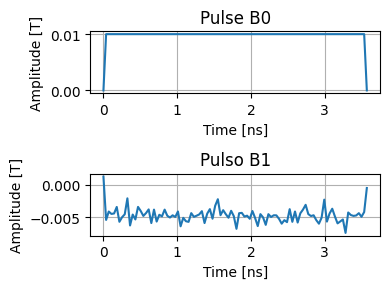

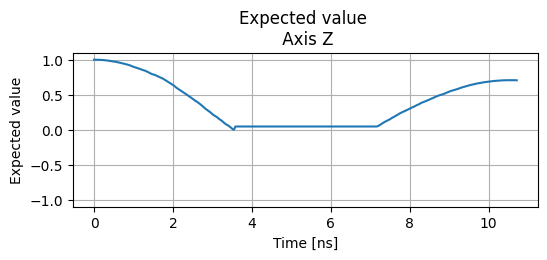

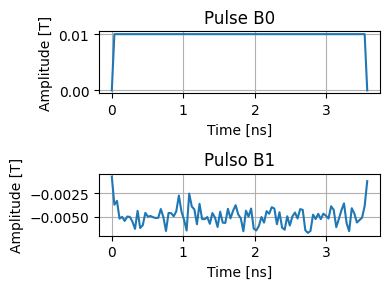

In [23]:
model = Quantum_Spin_Proces(tf_noise = True, noise_std = 0.0009)
ket_0 = basis(2, 0)
out = model.Ry(np.pi/4, ket_0)
model.plot_expect(out, True)
model.plot_excharges(out, 0, True)
model.plot_excharges(out, 1, True)
model.plot_excharges(out, 2, True)

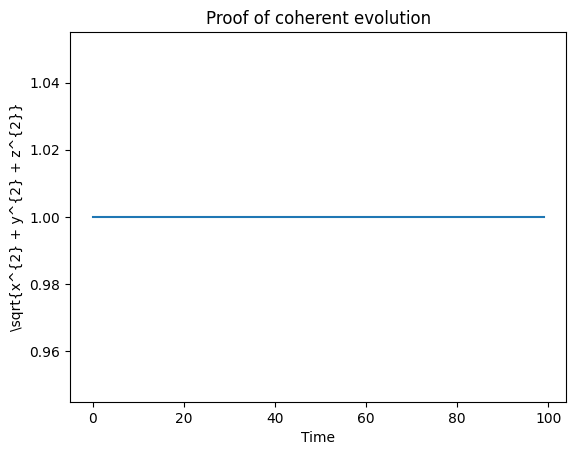

In [25]:
x = out[0].expect[0]
y = out[0].expect[1]
z = out[0].expect[2]
l = np.sqrt(x**2 + y**2 + z**2)

plt.figure()
plt.plot(l)
plt.title("Proof of coherent evolution")
plt.xlabel('Time')
plt.ylabel("\sqrt{x^{2} + y^{2} + z^{2}}")
plt.show()

# Pruebas de dos qubits

In [ ]:
model = Quantum_Spin_Proces()
ket_0 = basis(2, 0)
out = model.Ry(np.pi/4, ket_0, tf_expect = False)
out.states[-1]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.92388159-1.49262778e-06j]
 [0.38267847-8.05850792e-07j]]

In [ ]:
model = Quantum_Spin_Proces(N_qubits = 2)
ket_0 = tensor(basis(2, 0),basis(2, 0))
out = model.Ry(np.pi/2, ket_0, q_obj = 1,  tf_expect = False)
out.states[-1]

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.70711034-3.15568013e-06j]
 [0.70710323-4.58351280e-07j]
 [0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j]]

time_swap = 3.1415926535897933e-06


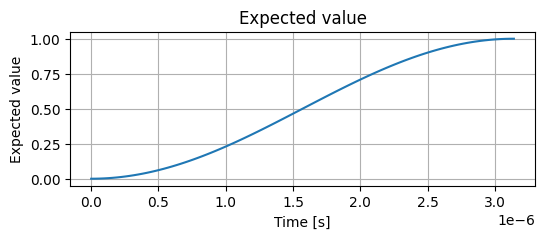

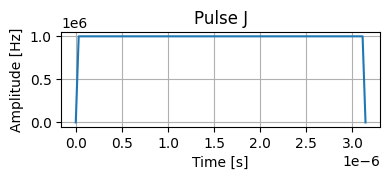

In [ ]:
import numpy as np
model = Quantum_Spin_Proces(J = 1e6, N_qubits = 2)
up = basis(2,0)
down = basis(2,1)
ket_0 = tensor(up, down)
out = model.SWAP(ket_0, np.array([[0,0,0,0],[0,0,0,0],[0,0,1,0],[0,0,0,0]]))
model.plot_excharges(out,0, j=True)

time_sqrt_swap = 1.5707963267948967e-06


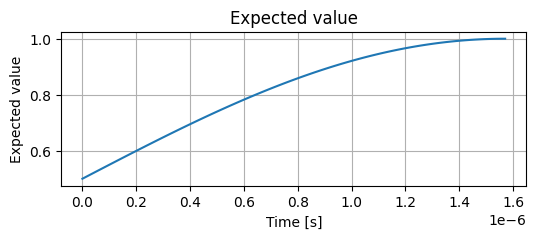

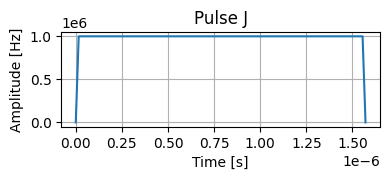

In [ ]:
model = Quantum_Spin_Proces(J = 1e6, N_qubits = 2)
up = basis(2,0)
down = basis(2,1)
ket_0 = tensor(up, down)

my_measure = np.array([[0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j],
 [0.0000 + 0.0000*1j,   0.5000 + 0.0000*1j ,  0.0000 + 0.5000*1j,   0.0000 + 0.0000*1j],
  [0.0000 + 0.0000*1j,   0.0000 - 0.5000*1j,   0.5000 + 0.0000*1j,   0.0000 + 0.0000*1j],
   [0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j]])

out = model.sqrt_SWAP(ket_0, my_measure)
model.plot_excharges(out,0, j=True)

In [ ]:
model = Quantum_Spin_Proces(J = 1e6, N_qubits = 2)

qbit_0 = basis(2,1)
qbit_1 = basis(2,0)
ket_0 = tensor(qbit_0, qbit_1)

print(ket_0.full())
print("\n")
# (self, alpha, ket_0, q_obj = 0, tf_expect = True)

# out = model.Ry(np.pi/4, ket_0, tf_expect = False)

state_1 = model.Ry(np.pi/2, ket_0, q_obj=1, tf_expect = False).states[-1]

print(state_1)
print("\n")

# sqrt_SWAP(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = True)

state_2 = model.sqrt_SWAP(state_1, [], tf_expectt = False).states[-1]

print(state_2)
print("\n")
state_3 = model.Rz(np.pi, state_2, q_obj = 0, tf_expect = False).states[-1]

print(state_3)
print("\n")
state_4 = model.sqrt_SWAP(state_3, [], tf_expectt = False).states[-1]

print(state_4)
print("\n")
state_5 = model.Rz(-np.pi/2, state_4, q_obj = 0, tf_expect = False).states[-1]

print(state_5)
print("\n")
state_6 = model.Rz(-np.pi/2, state_5, q_obj = 1, tf_expect = False).states[-1]

print(state_6)
print("\n")
state_7 = model.Ry(-np.pi/2, state_6, q_obj = 1, tf_expect = False).states[-1]

print(np.round(state_7.full(),2))
print("\n")

[[0.+0.j]
 [0.+0.j]
 [1.+0.j]
 [0.+0.j]]


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j]
 [0.70711034-3.15568013e-06j]
 [0.70710323-4.58351280e-07j]]


time_sqrt_swap = 1.5707963267948967e-06
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.        +0.j        ]
 [0.19134133-0.4619367j ]
 [0.46194598+0.19133334j]
 [0.65328178-0.27059815j]]


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        +0.j        ]
 [-0.46193355-0.19134895j]
 [-0.19132572+0.46194914j]
 [ 0.27060892+0.65327732j]]


time_sqrt_swap = 1.5707963267948967e-06
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.00000000e+00+0.00000000e+00j]
 [ 8.54520442e-06-7.94036959e-06j]
 [-4.99990117e-01+5.00003969e-01j]
 [ 5.00011004e-01+4.99994910e-01j]]


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj 

In [ ]:
state_7.full()
dm =  state_7 * state_7.dag()
np.round(dm.full(),2)

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.-0.j, 0.-0.j, 0.+0.j, 0.-0.j],
       [0.-0.j, 0.-0.j, 0.+0.j, 1.+0.j]])

# CNOT de clase

In [ ]:
# [0,0]
model = Quantum_Spin_Proces(N_qubits = 2, n_swap = 1, J = 1)
up = basis(2,0)
down = basis(2,0)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CNOT(ket_0, [])
state = model.CZ(state, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.abs(np.round(dm.full(),2))

time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966
[[-1.-0.j]
 [ 0.+0.j]
 [-0.+0.j]
 [-0.+0.j]]


array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# [0,1]
model = Quantum_Spin_Proces(N_qubits = 2)
up = basis(2,0)
down = basis(2,1)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CNOT(ket_0, [])
state = model.CZ(state, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.abs(np.round(dm.full(),2))

time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966
[[-0.+0.j]
 [-1.+0.j]
 [ 0.-0.j]
 [-0.+0.j]]


array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# [1,0]
model = Quantum_Spin_Proces(N_qubits = 2)
up = basis(2,1)
down = basis(2,0)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CNOT(ket_0, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.round(dm.full(),2)

time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966
[[-0.   +0.j   ]
 [-0.   +0.j   ]
 [-0.   +0.j   ]
 [-0.707+0.707j]]


array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.-0.j, 0.-0.j, 0.+0.j, 0.-0.j],
       [0.-0.j, 0.-0.j, 0.+0.j, 1.+0.j]])

In [ ]:
# [1,1]
model = Quantum_Spin_Proces(N_qubits = 2)
up = basis(2,1)
down = basis(2,1)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CNOT(ket_0, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.round(dm.full(),2)

time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966
[[ 0.   -0.j   ]
 [ 0.   -0.j   ]
 [-0.707+0.707j]
 [ 0.   +0.j   ]]


array([[ 0.+0.j,  0.+0.j, -0.-0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j, -0.-0.j,  0.-0.j],
       [-0.+0.j, -0.+0.j,  1.+0.j, -0.+0.j],
       [ 0.+0.j,  0.+0.j, -0.-0.j,  0.+0.j]])

# CZ clase

In [ ]:
# [0,0]
model = Quantum_Spin_Proces(N_qubits = 2)
up = basis(2,0)
down = basis(2,0)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CZ(ket_0, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.abs(np.round(dm.full(),2))

time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966
[[0.707+0.707j]
 [0.   +0.j   ]
 [0.   +0.j   ]
 [0.   +0.j   ]]


array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# [0,1]
model = Quantum_Spin_Proces(N_qubits = 2)
up = basis(2,0)
down = basis(2,1)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CZ(ket_0, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.abs(np.round(dm.full(),2))

time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966
[[ 0.   +0.j   ]
 [ 0.707+0.707j]
 [-0.   -0.j   ]
 [ 0.   +0.j   ]]


array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# [1,0]
model = Quantum_Spin_Proces(N_qubits = 2)
up = basis(2,1)
down = basis(2,0)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CZ(ket_0, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.abs(np.round(dm.full(),2))

time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966
[[0.   +0.j   ]
 [0.   +0.j   ]
 [0.707+0.707j]
 [0.   +0.j   ]]


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# [1,1]
model = Quantum_Spin_Proces(N_qubits = 2)
up = basis(2,1)
down = basis(2,1)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CZ(ket_0, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.round(dm.full(),2)

time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966
[[ 0.   +0.j   ]
 [ 0.   +0.j   ]
 [ 0.   +0.j   ]
 [-0.707-0.707j]]


array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

# H gate

In [ ]:
model = Quantum_Spin_Proces()
ket_0 = basis(2, 0)
out = model.H(ket_0, tf_expect = False)
state = out.states[-1]
print(np.round(state.full(),3))
dm =  state * state.dag()
np.round(dm.full(),2)

[[ 0.-0.707j]
 [-0.-0.707j]]


array([[0.5+0.j, 0.5+0.j],
       [0.5-0.j, 0.5+0.j]])

In [ ]:
model = Quantum_Spin_Proces()
ket_0 = basis(2, 1)
out = model.H(ket_0, tf_expect = False)
state = out.states[-1]
print(np.round(state.full(),3))
dm =  state * state.dag()
np.round(dm.full(),2)

[[0.-0.707j]
 [0.+0.707j]]


array([[ 0.5+0.j, -0.5-0.j],
       [-0.5+0.j,  0.5+0.j]])

# Pruebas de entrelazamiento

In [ ]:
from qutip import concurrence

In [ ]:
model = Quantum_Spin_Proces(N_qubits = 2)

up = basis(2,0)
down = basis(2,0)
ket_0 = tensor(up, down)

out = model.H(ket_0, q_obj = 0, tf_expect = False)
state_H = out.states[-1]

print(np.round(state_H.full(),3))
dm =  state_H * state_H.dag()
np.abs(np.round(dm.full(),2))

out = model.CNOT(state_H, [], q_obj = [0,1])
state_2 = out

print(np.round(state_2.full(),3))
dm =  state_2 * state_2.dag()
np.abs(np.round(dm.full(),4))


concurrence(state_2)

[[ 0.-0.707j]
 [ 0.+0.j   ]
 [-0.-0.707j]
 [ 0.+0.j   ]]
time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966
[[0.5+0.5j]
 [0. -0.j ]
 [0. +0.j ]
 [0.5+0.5j]]


0.9999999950197902

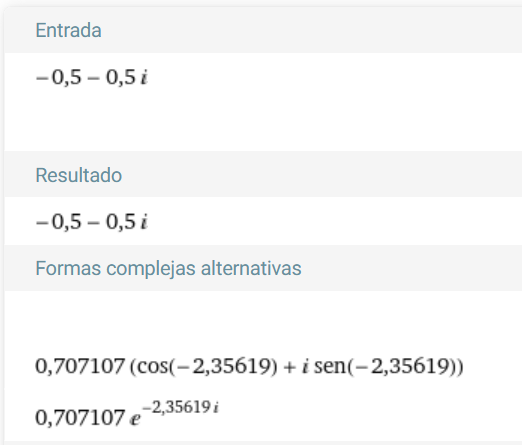

In [ ]:
model = Quantum_Spin_Proces(N_qubits = 2)

up = basis(2,0)
down = basis(2,1)
ket_0 = tensor(up, down)

out = model.H(ket_0, q_obj = 0, tf_expect = False)
state_H = out.states[-1]

print(np.round(state_H.full(),3))
dm =  state_H * state_H.dag()
np.abs(np.round(dm.full(),2))

out = model.CNOT(state_H, [], q_obj = [0,1])
state_2 = out

print(np.round(state_2.full(),3))
dm =  state_2 * state_2.dag()
np.abs(np.round(dm.full(),4))


concurrence(state_2)

[[ 0.+0.j   ]
 [ 0.-0.707j]
 [ 0.+0.j   ]
 [-0.-0.707j]]
time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966
[[0. -0.j ]
 [0.5+0.5j]
 [0.5+0.5j]
 [0. -0.j ]]


0.9999999966361008

In [ ]:
model = Quantum_Spin_Proces(N_qubits = 2)

up = basis(2,1)
down = basis(2,0)
ket_0 = tensor(up, down)

out = model.H(ket_0, q_obj = 0, tf_expect = False)
state_H = out.states[-1]

print(np.round(state_H.full(),3))
dm =  state_H * state_H.dag()
np.abs(np.round(dm.full(),2))

out = model.CNOT(state_H, [], q_obj = [0,1])
state_2 = out

print(np.round(state_2.full(),3))
dm =  state_2 * state_2.dag()

print(state_2.dag())

print(np.round(dm.full(),4))


concurrence(state_2)

[[0.-0.707j]
 [0.+0.j   ]
 [0.+0.707j]
 [0.+0.j   ]]
time_sqrt_swap = 1.5707963267948966
time_sqrt_swap = 1.5707963267948966
[[ 0.5+0.5j]
 [-0. -0.j ]
 [-0. -0.j ]
 [-0.5-0.5j]]
Quantum object: dims = [[1, 1], [2, 2]], shape = (1, 4), type = bra
Qobj data =
[[ 4.99950938e-01-5.00039382e-01j -2.29403321e-06+1.09147681e-04j
  -8.89792785e-05+3.05482279e-07j -5.00062263e-01+4.99947386e-01j]]
[[ 5.e-01+0.j     -1.e-04+0.0001j -0.e+00-0.j     -5.e-01-0.0001j]
 [-1.e-04-0.0001j  0.e+00+0.j      0.e+00+0.j      1.e-04+0.0001j]
 [-0.e+00+0.j      0.e+00-0.j      0.e+00+0.j      0.e+00-0.j    ]
 [-5.e-01+0.0001j  1.e-04-0.0001j  0.e+00+0.j      5.e-01+0.j    ]]


0.999999978930816